In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Configurando o max_columns no pandas
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)

### Analysis de Feminicídio
Os dados foram extraídos da Secretaria de Segurança de São Paulo [SSP](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx) no perído de 2016-2022

In [2]:
# Realizando a leitura para cada aba da planilha disponibilizada pela SSP
ex_arquivo = pd.ExcelFile("C:\\Users\\gabriel\\Desktop\\analysis\\Dados Feminicidio\\Feminicidio_2015_2022.xlsx")

df_2016 = pd.read_excel(ex_arquivo, sheet_name='2016')
df_2017 = pd.read_excel(ex_arquivo, sheet_name='2017')
df_2018 = pd.read_excel(ex_arquivo, sheet_name='2018')
df_2019 = pd.read_excel(ex_arquivo, sheet_name='2019')
df_2020 = pd.read_excel(ex_arquivo, sheet_name='2020')
df_2021 = pd.read_excel(ex_arquivo, sheet_name='2021')
df_2022 = pd.read_excel(ex_arquivo, sheet_name=' 2022')

C:\Users\gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
df = pd.DataFrame()

df = pd.concat([df, df_2016])
df = pd.concat([df, df_2017])
df = pd.concat([df, df_2018])
df = pd.concat([df, df_2019])
df = pd.concat([df, df_2020])
df = pd.concat([df, df_2021])
df = pd.concat([df, df_2022])

In [4]:
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,...,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,DEINTER 4,SEC Bauru,Bauru,001 DP - Bauru,1.0,1,60404,1,2016,2016-01-19,1533,2016,BAURU,CENTRAL POL.JUDICIÁRIA-BAURU,DEL.SEC.BAURU,...,2016-01-19,04:30:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,32.0,1983-10-16,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,DEINTER 4,SEC Bauru,Bauru,001 DP - Bauru,NaN,1,60404,1,2016,2016-01-19,1533,2016,BAURU,CENTRAL POL.JUDICIÁRIA-BAURU,DEL.SEC.BAURU,...,2016-01-19,04:30:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,72.0,1943-09-27,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,DEINTER 4,SEC Bauru,Bauru,001 DP - Bauru,NaN,1,60404,1,2016,2016-01-19,1533,2016,BAURU,CENTRAL POL.JUDICIÁRIA-BAURU,DEL.SEC.BAURU,...,2016-01-19,04:30:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,27.0,1988-01-25,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,DEINTER 2,2ª Seccional Campinas,Campinas,009 DP - Campinas,1.0,1,70942,2,2016,2016-02-12,1168,2016,CAMPINAS,DEL.SEC.2ª CAMPINAS-PLANTÃO,DEL.SEC.2º CAMPINAS,...,2016-02-12,04:15:00,Saúde,AVENIDA RUI RODRIGUES,13000.0,-22.950911,-47.111880,Vítima,Feminino,29.0,1986-10-25,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,DECAP,4ª SEC,São Paulo,090 DP - Parque Novo Mundo,1.0,1,10336,2,2016,2016-02-07,1393,2016,S.PAULO,73º D.P. JACANA,DEL.SEC.4º NORTE,...,2016-02-07,05:30:00,Via pública,RUA CANAPOLIS,247.0,-23.493130,-46.579755,Vítima,Feminino,39.0,1976-09-29,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


In [5]:
df.tail()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,SEC_ELABORACAO,...,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
190,DEMACRO,SEC Guarulhos,Guarulhos,004 DP - Guarulhos,1.0,1,30212,12,2022,2022-12-09,5983,2022,GUARULHOS,04º D.P. GUARULHOS,DEL.SEC.GUARULHOS,...,2022-12-09,12:30:00,Saúde,Rua São José do Paraíso,100.0,-23.439885,-46.409521,Vítima,Feminino,28.0,1994-08-18,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
191,DEMACRO,SEC Guarulhos,Guarulhos,006 DP - Guarulhos,1.0,1,30216,12,2022,2022-12-07,828,2022,GUARULHOS,06º D.P. GUARULHOS,DEL.SEC.GUARULHOS,...,2022-12-07,11:16:00,Via pública,RUA FONTE BOA,8.0,-23.448946,-46.507070,Vítima,Feminino,37.0,1984-12-08,Parda,OUTROS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
192,DEMACRO,SEC Guarulhos,Guarulhos,009 DP - Guarulhos,1.0,1,30217,12,2022,2022-12-28,4172,2022,GUARULHOS,07º D.P. GUARULHOS,DEL.SEC.GUARULHOS,...,2022-12-28,DE MADRUGADA,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,28.0,1994-06-21,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
193,DEMACRO,SEC Mogi das Cruzes,Ferraz de Vasconcelos,001 DP - Ferraz de Vasconcelos,1.0,1,30302,12,2022,2022-12-29,3650,2022,FERRAZ DE VASCONCELOS,DEL.POL.FERRAZ DE VASCONCELOS,DEL.SEC.MOGI DAS CRUZES,...,2022-12-28,21:17:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,2.0,2020-09-01,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
194,DEMACRO,SEC Mogi das Cruzes,Ferraz de Vasconcelos,DM - Ferraz de Vasconcelos,1.0,1,10353,12,2022,2022-12-25,7010,2022,S.PAULO,53º D.P. PARQUE DO CARMO,DEL.SEC.MOGI DAS CRUZES,...,2022-12-12,11:00:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,23.0,1999-11-27,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


In [6]:
df.shape

(1019, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 194
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  1019 non-null   object        
 1   SECCIONAL_CIRCUNSCRICAO     1019 non-null   object        
 2   MUNICIPIO_CIRCUNSCRICAO     1019 non-null   object        
 3   DP_CIRCUNSCRICAO            1019 non-null   object        
 4   HD                          973 non-null    float64       
 5   Nº DE VÍT HD                1019 non-null   int64         
 6   ID_DELEGACIA                1019 non-null   int64         
 7   MÊS ESTATISTICA             1019 non-null   int64         
 8   ANO ESTATISTICA             1019 non-null   int64         
 9   DATAHORA_REGISTRO_BO        1019 non-null   datetime64[ns]
 10  NUM_BO                      1019 non-null   object        
 11  ANO_BO                      1019 non-null   int64         
 12

In [8]:
df.describe()

,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,ANO_BO,DATA_FATO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA
count,973.0,1019.0,1019.000000,1019.000000,1019.000000,1019,1019.000000,1019,331.000000,309.000000,309.000000,1011.000000,1008
mean,1.0,1.0,65447.876349,6.708538,2019.469087,2019-12-26 02:12:45.506378752,2019.472031,2019-12-25 13:21:15.368007936,1218.589124,-22.886798,-47.053274,35.898121,1983-08-07 10:40:00
min,1.0,1.0,10101.000000,1.000000,2016.000000,2016-01-19 00:00:00,2016.000000,2016-01-19 00:00:00,0.000000,-24.538717,-52.113980,1.000000,1931-10-26 00:00:00
25%,1.0,1.0,30126.000000,4.000000,2018.000000,2018-07-29 00:00:00,2018.000000,2018-07-29 00:00:00,20.000000,-23.588189,-47.522510,27.000000,1976-05-17 12:00:00
50%,1.0,1.0,60405.000000,7.000000,2020.000000,2020-01-14 00:00:00,2020.000000,2020-01-14 00:00:00,135.000000,-23.435339,-46.794108,34.000000,1985-07-30 12:00:00
75%,1.0,1.0,100409.500000,10.000000,2021.000000,2021-06-04 12:00:00,2021.000000,2021-06-04 12:00:00,643.500000,-22.476922,-46.556460,43.000000,1993-03-01 12:00:00
max,1.0,1.0,900556.000000,12.000000,2022.000000,2022-12-30 23:32:00,2023.000000,2022-12-29 00:00:00,99999.000000,0.000000,0.000000,88.000000,2020-11-06 00:00:00
std,0.0,0.0,65426.097613,3.578812,1.842997,NaN,1.847303,NaN,7861.788195,1.596656,2.908912,13.769981,NaN


#### Selecionando apenas colunas que podem gerar insights 

In [9]:
# Selecionando apenas colunas que podem gerar insights 
df_2 = df[['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'MÊS ESTATISTICA', 'ANO ESTATISTICA', 'DATAHORA_REGISTRO_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO','HORA_FATO', 'DATA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA', 'DESDOBRAMENTO']]

##### Renomeando as colunas

In [10]:
df_2 = df_2.rename(columns={'DEPARTAMENTO_CIRCUNSCRICAO': 'departamento_circunscricao', 'SECCIONAL_CIRCUNSCRICAO': 'seccional_circunscricao', 'MUNICIPIO_CIRCUNSCRICAO': 'municipio_circunscricao', 'DP_CIRCUNSCRICAO ': 'dp_circunscricao', 'MÊS ESTATISTICA': 'mes_estatistica', 'ANO ESTATISTICA': 'ano_estatistica', 'DATAHORA_REGISTRO_BO': 'datahora_registro_bo', 'ANO_BO': 'ano_bo',  'MUNICIPIO_ELABORACAO': 'municipio_elaboracao', 'DP_ELABORACAO': 'dp_elaboracao', 'SEC_ELABORACAO': 'sec_elaboracao', 'HORA_FATO': 'hora_fato', 'DATA_FATO': 'data_fato', 'DESC_TIPOLOCAL': 'desc_tipo_local', 'LOGRADOURO': 'logradouro', 'NUMERO_LOGRADOURO': 'num_logradouro', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'TIPO_PESSOA': 'tp_pessoa', 'SEXO_PESSOA': 'sexo_pessoa', 'IDADE_PESSOA': 'idade_pessoa', 'DATA_NASCIMENTO_PESSOA': 'dt_nascimento_pessoa', 'COR_PELE': 'cor_pele', 'PROFISSAO': 'profissao', 'NATUREZA_APURADA': 'natureza_apurada'})

In [11]:
df_2.columns

Index(['departamento_circunscricao', 'seccional_circunscricao',
       'municipio_circunscricao', 'dp_circunscricao', 'mes_estatistica',
       'ano_estatistica', 'datahora_registro_bo', 'ano_bo',
       'municipio_elaboracao', 'dp_elaboracao', 'sec_elaboracao', 'hora_fato',
       'data_fato', 'desc_tipo_local', 'logradouro', 'num_logradouro',
       'latitude', 'longitude', 'tp_pessoa', 'sexo_pessoa', 'idade_pessoa',
       'dt_nascimento_pessoa', 'cor_pele', 'profissao', 'natureza_apurada',
       'DESDOBRAMENTO'],
      dtype='object')

#### Colunas com campos não preenchidos

<Axes: >

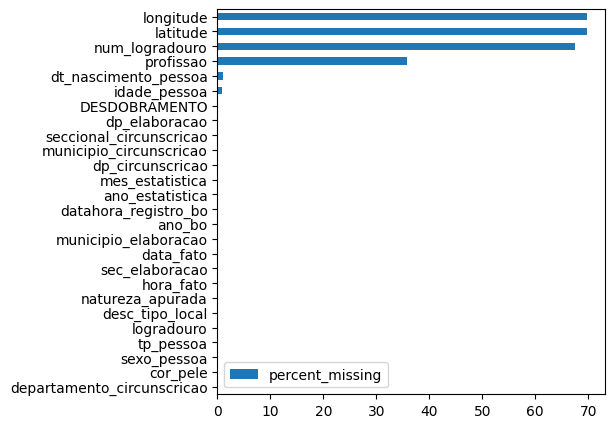

In [12]:
percent_missing = df_2.isnull().sum() * 100 / len(df_2)
qtde_registros_missing = df_2.isnull().sum()
missing_values =  pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by='percent_missing').plot(kind='barh', figsize=(5, 5))

### Analisando as variáveis

### Profissão
A variável descreve a profissão da vítima catalogada na hora do cadastramento do BO
##### Tratamentos
1. Valores cadastrados de formas deferentes (Via pública => via publica..)
##### Comentários
- Esta columna possui cerca de 40% do total da base em valores NULLS, porém podemos utilizar técnica de preenchimento de most_frequent.
- A coluna possui um grande preenchimento como "Não Informada"

In [13]:
df_2['profissao'].describe()

count                    654
unique                   104
top       PRENDAS DOMESTICAS
freq                     102
Name: profissao, dtype: object

In [14]:
df_2['profissao'].isna().value_counts()

profissao
False    654
True     365
Name: count, dtype: int64

<Axes: ylabel='profissao'>

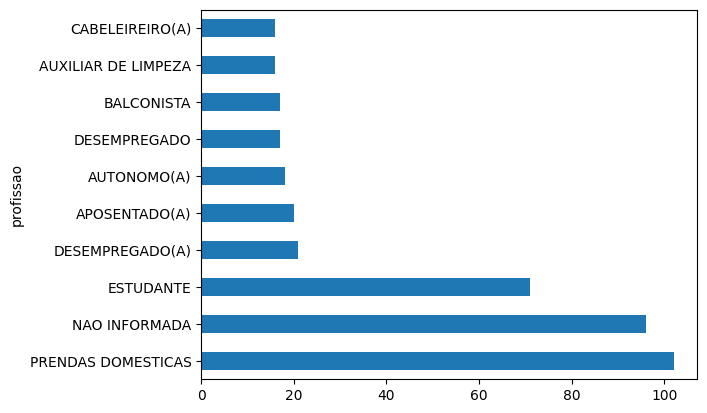

In [15]:
df_2['profissao'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh')

### Data de nascimento da vítima
A variável descreve a data de nascimento da vítima

#### Comentários
1. Existem indivíduos com data de nascimento porém com idade não preenchida

In [16]:
df_2['dt_nascimento_pessoa'].describe()

count                   1008
mean     1983-08-07 10:40:00
min      1931-10-26 00:00:00
25%      1976-05-17 12:00:00
50%      1985-07-30 12:00:00
75%      1993-03-01 12:00:00
max      2020-11-06 00:00:00
Name: dt_nascimento_pessoa, dtype: object

In [17]:
df_2['dt_nascimento_pessoa'].isna().value_counts()

dt_nascimento_pessoa
False    1008
True       11
Name: count, dtype: int64

In [18]:
df_2[(df_2['dt_nascimento_pessoa'].isna()) & (df_2['idade_pessoa'].notna())].head()

,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,mes_estatistica,ano_estatistica,datahora_registro_bo,ano_bo,municipio_elaboracao,dp_elaboracao,sec_elaboracao,hora_fato,data_fato,desc_tipo_local,logradouro,num_logradouro,latitude,longitude,tp_pessoa,sexo_pessoa,idade_pessoa,dt_nascimento_pessoa,cor_pele,profissao,natureza_apurada,DESDOBRAMENTO
41,DEMACRO,SEC Carapicuíba,Itapevi,DM - Itapevi,8,2016,2016-08-14,2016,ITAPEVI,DEL.POL.ITAPEVI,DEL.SEC.CARAPICUIBA,18:31:00,2016-08-14,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,52.0,NaT,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
67,DEINTER 4,SEC Bauru,Agudos,DM - Agudos,8,2017,2017-08-14,2017,AGUDOS,DEL.POL.AGUDOS,DEL.SEC.BAURU,23:50:00,2017-08-14,Area não ocupada,ESTRADA AGUDOS/SP X GAUIANAS/SP,NaN,NaN,NaN,Vítima,Feminino,24.0,NaT,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
75,DECAP,7ª SEC,São Paulo,062 DP - Ermelino Matarazzo,6,2019,2019-06-13,2019,S.PAULO,24º D.P. PONTE RASA,DEL.SEC.7º ITAQUERA,18:20:00,2019-06-13,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,NaN,NaN,Vítima,Feminino,26.0,NaT,Parda,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


In [19]:
print('Casos com data de nascimento não preenchida mas com idade: '+str(len(df_2[(df_2['dt_nascimento_pessoa'].isna()) & (df_2['idade_pessoa'].notna())])))

Casos com data de nascimento não preenchida mas com idade: 3


### Idade da vítima
A variável descreve idade da vítima

In [20]:
df_2['idade_pessoa'].describe()

count    1011.000000
mean       35.898121
std        13.769981
min         1.000000
25%        27.000000
50%        34.000000
75%        43.000000
max        88.000000
Name: idade_pessoa, dtype: float64

In [21]:
df_2['idade_pessoa'].isna().value_counts()

idade_pessoa
False    1011
True        8
Name: count, dtype: int64

In [22]:
df_idade_notna = df_2[(df_2['idade_pessoa'].notna()) & (df_2['idade_pessoa'] != 'NULL ')]

<Axes: xlabel='idade_pessoa', ylabel='Count'>

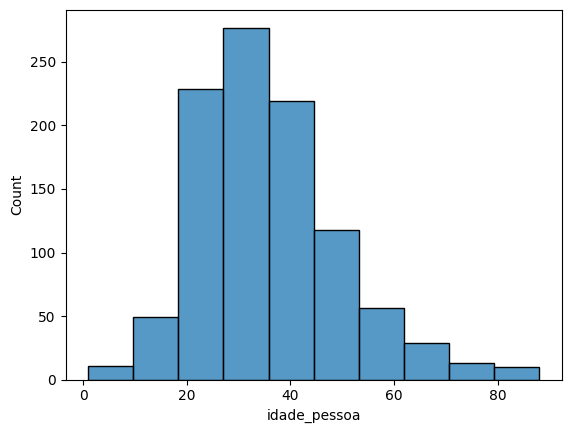

In [23]:
sns.histplot(df_idade_notna['idade_pessoa'], bins=10)

### Cor da vítima
A variável descreve a cor da vítime do crime de homicídio
##### Tratamentos
1. Valores cadastrados de formas deferentes (Preta => preta)
##### Comentários
- A variável possui uma grande volumetria em Via pública
- Alto preenchimento da coluna, apenas 6 linhas com NULLs

In [24]:
## Tratrando coluna 
df_2['cor_pele'].loc[df_2['cor_pele'].str.contains("pre")==True] = 'Preta'

C:\Users\gabriel\AppData\Local\Temp\ipykernel_6524\2618161973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cor_pele'].loc[df_2['cor_pele'].str.contains("pre")==True] = 'Preta'


In [25]:
df_2['cor_pele'].describe()

count       1019
unique         5
top       Branca
freq         580
Name: cor_pele, dtype: object

In [26]:
# Valores NULLS
df_2['cor_pele'].isna().value_counts()

cor_pele
False    1019
Name: count, dtype: int64

In [27]:
# Quantidade por valor
df_2['cor_pele'].value_counts()

cor_pele
Branca      580
Parda       361
Preta        67
Ignorada      6
Amarela       5
Name: count, dtype: int64

### Tipo da pessoa
A variável descreve a cor da vítime do crime de homicídio
##### Tratamentos
1. Valores cadastrados de formas deferentes (Vitíma => 'Vitima  ')

In [28]:
df_2['tp_pessoa'].describe()

count       1019
unique         4
top       Vítima
freq        1016
Name: tp_pessoa, dtype: object

In [29]:
df_2['tp_pessoa'].isna().value_counts()

tp_pessoa
False    1019
Name: count, dtype: int64

In [30]:
df_2['tp_pessoa'].value_counts()

tp_pessoa
Vítima                  1016
Autor/Vitima               1
Encontro de Cadáver        1
Vítima                     1
Name: count, dtype: int64

<Axes: ylabel='tp_pessoa'>

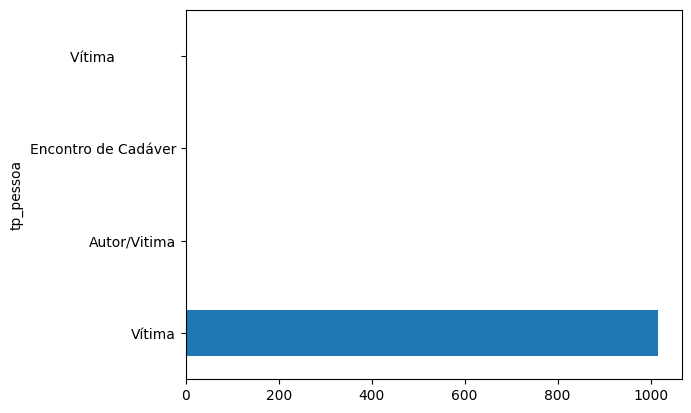

In [31]:
df_2['tp_pessoa'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh')

### Natureza Apurada
A variável descreve a natureza do crime, sendo a base de homicídios temos apenas essa opção

In [32]:
df_2['natureza_apurada'].value_counts()

natureza_apurada
HOMICÍDIO DOLOSO    1019
Name: count, dtype: int64

### Ano estatística
A variável descreve o ano dos fatos ocorridos

<Axes: xlabel='ano_estatistica'>

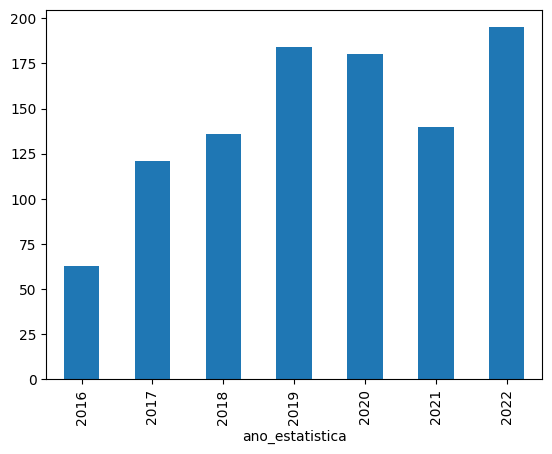

In [33]:
df_ordenado_anomes = df_2.sort_values('ano_estatistica',key=lambda x: pd.to_datetime(x, format='%Y'))
df_ordenado_anomes.groupby('ano_estatistica').size().plot(kind='bar')

### Mês estatística
A variável descreve o mês em formato numérico dos fatos ocorridos

In [34]:
df_2['mes_estatistica'].describe()

count    1019.000000
mean        6.708538
std         3.578812
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: mes_estatistica, dtype: float64

In [35]:
df_2['mes_estatistica'].isna().value_counts()

mes_estatistica
False    1019
Name: count, dtype: int64

#### Observando o mês x ano que mais ocorreram homicídios

<Axes: xlabel='mes_estatistica', ylabel='ano_estatistica'>

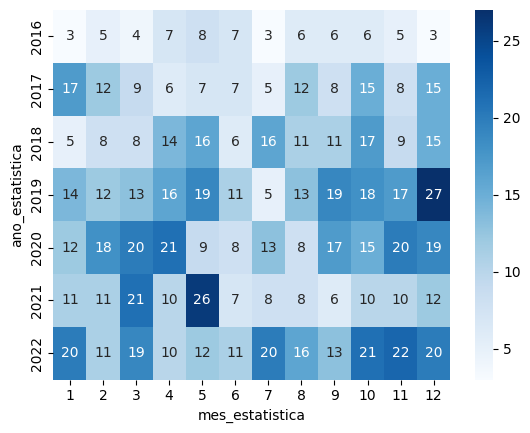

In [36]:
sns.heatmap(pd.crosstab(df_2['ano_estatistica'], df_2['mes_estatistica']), annot=True, cmap="Blues")

### Hora do Fato
A variável descreve a hora do ocorrido

##### Tratamentos
1 - Existem valores como texto no campo de hora, por exemplo: "A TARDE", "PELA MANHÃ"

In [37]:
df_2['hora_fato'].describe()

count                1019
unique                458
top       EM HORA INCERTA
freq                   30
Name: hora_fato, dtype: object

In [38]:
df_2['hora_fato'].isna().sum()

0

In [39]:
df_2['hora_fato'].value_counts().head(10)

hora_fato
EM HORA INCERTA    30
DE MADRUGADA       29
PELA MANHÃ         23
23:00:00           14
00:00:00           13
A TARDE            13
19:00:00           13
16:00:00           12
18:00:00           11
07:00:00           11
Name: count, dtype: int64

In [40]:
df_2['hora_fato'].head(2)

0    04:30:00
1    04:30:00
Name: hora_fato, dtype: object

### Data do Fato

In [41]:
df_2['data_fato'].describe()

count                             1019
mean     2019-12-25 13:21:15.368007936
min                2016-01-19 00:00:00
25%                2018-07-29 00:00:00
50%                2020-01-14 00:00:00
75%                2021-06-04 12:00:00
max                2022-12-29 00:00:00
Name: data_fato, dtype: object

In [42]:
df_2['data_fato'].isna().sum()

0

In [43]:
df_2['data_fato'].value_counts().head(5)

data_fato
2017-01-01    10
2020-12-21     4
2020-03-15     4
2022-10-08     4
2022-01-18     4
Name: count, dtype: int64

### Seccional Circunscricao
A variável descreve a delegacia responsável pela investigação do crime
#### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [44]:
df_2['seccional_circunscricao'].describe()

count       1019
unique        71
top       6ª SEC
freq          50
Name: seccional_circunscricao, dtype: object

In [45]:
df_2['seccional_circunscricao'].isna().value_counts()

seccional_circunscricao
False    1019
Name: count, dtype: int64

In [46]:
df_2['seccional_circunscricao'].value_counts().head(15)

seccional_circunscricao
6ª SEC                   50
SEC Carapicuíba          39
SEC Sorocaba             38
SEC Mogi das Cruzes      36
7ª SEC                   34
8ª SEC                   32
4ª SEC                   32
SEC Guarulhos            32
3ª SEC                   30
1ª Seccional Campinas    27
2ª Seccional Campinas    26
SEC Santo André          25
SEC Bauru                24
SEC Osasco               22
SEC Araraquara           21
Name: count, dtype: int64

<Axes: ylabel='count'>

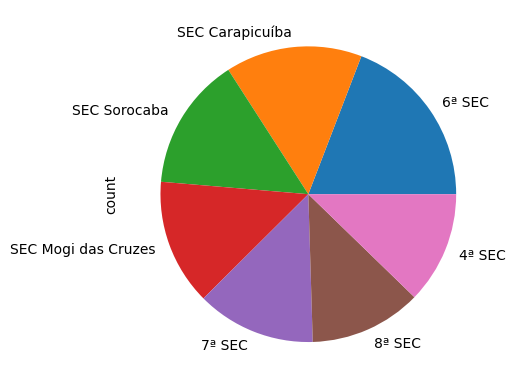

In [47]:
df_2['seccional_circunscricao'].value_counts().head(7).sort_values(ascending=False).plot.pie()

### Municipio Circunscricao
A variável descreve o municipio onde está localizado a Delegacia de polícia responsável pela investigação do crime
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [48]:
df_2['municipio_circunscricao'].describe()

count          1019
unique          260
top       São Paulo
freq            226
Name: municipio_circunscricao, dtype: object

In [49]:
df_2['municipio_circunscricao'].isna().value_counts()

municipio_circunscricao
False    1019
Name: count, dtype: int64

In [50]:
df_2['municipio_circunscricao'].value_counts().head(15)

municipio_circunscricao
São Paulo                226
Campinas                  47
Guarulhos                 27
Osasco                    22
Sorocaba                  18
Ribeirão Preto            14
Bauru                     12
São José dos Campos       12
Santo André               12
Mauá                      11
Piracicaba                11
Itaquaquecetuba           10
São Bernardo do Campo     10
São José do Rio Preto     10
Limeira                    9
Name: count, dtype: int64

### DP Circunscricao
A variável descrive a delegacia de policia responsável pela investigação do crime
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

In [51]:
df_2['dp_circunscricao'].describe()

count                       1019
unique                       492
top       047 DP - Capão Redondo
freq                          14
Name: dp_circunscricao, dtype: object

In [52]:
df_2['dp_circunscricao'].isna().value_counts()

dp_circunscricao
False    1019
Name: count, dtype: int64

In [53]:
df_2['dp_circunscricao'].value_counts().head(15)

dp_circunscricao
047 DP - Capão Redondo         14
003 DP - Campinas              12
025 DP - Parelheiros           11
009 DP - Campinas               9
100 DP - Jardim Herculano       9
DM - Itaquaquecetuba            7
062 DP - Ermelino Matarazzo     7
073 DP - Jaçanã                 7
006 DP - Santo André            7
011 DP - Campinas               7
046 DP - Perus                  7
DM - Ubatuba                    6
069 DP - Teotônio Vilela        6
DM - Itapevi                    6
024 DP - Ponte Rasa             6
Name: count, dtype: int64

### Departamento Circunscricao
A variável descreve o departamento responsável pela investigação do crime

In [54]:
df_2['departamento_circunscricao'].describe()

count      1019
unique       12
top       DECAP
freq        226
Name: departamento_circunscricao, dtype: object

In [55]:
df_2['departamento_circunscricao'].isna().value_counts()

departamento_circunscricao
False    1019
Name: count, dtype: int64

In [56]:
df_2['departamento_circunscricao'].value_counts()

departamento_circunscricao
DECAP         226
DEMACRO       212
DEINTER 3     109
DEINTER 2     100
DEINTER 9      71
DEINTER 4      68
DEINTER 7      63
DEINTER 1      46
DEINTER 5      44
DEINTER 6      34
DEINTER 8      30
DEINTER 10     16
Name: count, dtype: int64

### Logradouro
A variável descreve o logradouro onde ocorreu crime de homicídio 
##### Tratamentos
1. Possívelmente retirar espaços em ltrim() e rtrim()

##### Comentários
A variável possui valores aparentetemente com limitação/bloqueio de divulgação de informações "DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS"

In [57]:
df_2['logradouro'].describe()

count                                              1019
unique                                              328
top       DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS 
freq                                                648
Name: logradouro, dtype: object

In [58]:
df_2['logradouro'].isna().value_counts()

logradouro
False    1019
Name: count, dtype: int64

In [59]:
df_2['logradouro'].value_counts().head(20)

logradouro
DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS     648
DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS      39
CHÁCARA DOS IPES                                   2
RUA APÓSTOLO SIMÃO PEDRO                           2
RUA LUIS GOIS                                      2
RUA TIRIGI BASTIA                                  2
RUA DA FE                                          2
AVENIDA JOAQUIM LOPES ÁGUILA                       2
RUA MONSENHOR ANDRADE                              1
ESTRADA DO MARENGO                                 1
RUA JORGE TOME                                     1
RUA estevan peres alvarez                          1
RUA raul seixas                                    1
AVENIDA FERNANDO FIGUEIREDO LINS                   1
RUA GERCINO GOMES DA SILVA                         1
PRAÇA ATALIBA LEONEL                               1
RUA PICA-PAU                                       1
ALAMEDA OLGA                                       1
RUA sete                           

### Número do Logradouro
Variável contendo o número do logradouro onde ocorreu crime de homicídio 



##### Comentários
Existem números como "9999.0" que podem ser considerados com "faltantes"

In [60]:
df_2['num_logradouro'].describe()

count      331.000000
mean      1218.589124
std       7861.788195
min          0.000000
25%         20.000000
50%        135.000000
75%        643.500000
max      99999.000000
Name: num_logradouro, dtype: float64

In [61]:
df_2['num_logradouro'].isna().value_counts()

num_logradouro
True     688
False    331
Name: count, dtype: int64

In [62]:
df_2['num_logradouro'].value_counts().head(20)

num_logradouro
1.0       36
0.0       25
100.0      6
10.0       5
20.0       4
8.0        4
200.0      4
98.0       3
265.0      3
50.0       3
85.0       2
63.0       2
281.0      2
1480.0     2
520.0      2
26.0       2
3.0        2
70.0       2
40.0       2
47.0       2
Name: count, dtype: int64

### Descrição do tipo local
A variável descreve o local do crime ocorrido
##### Tratamentos
1. Valores cadastrados de formas deferentes (Via pública => via publica..)
2. Possívelmente retirar espaços em ltrim() e rtrim()
##### Comentários
A variável possui uma grande volumetria em Via pública e cerca de 6 linhas nulas

In [63]:
df_2['desc_tipo_local'].describe()

count           1019
unique            19
top       Residência
freq             673
Name: desc_tipo_local, dtype: object

In [64]:
df_2['desc_tipo_local'].isna().value_counts()

desc_tipo_local
False    1019
Name: count, dtype: int64

In [65]:
df_2['desc_tipo_local'].value_counts()

desc_tipo_local
Residência                   673
Via pública                  221
Comércio e serviços           23
Unidade rural                 22
Area não ocupada              15
Saúde                         13
Hospedagem                    11
Condominio Residencial         9
Rodovia/Estrada                8
Restaurante e afins            6
Lazer e recreação              5
Escritório                     3
Estabelecimento prisional      3
Favela                         2
Serviços e bens públicos       1
Condominio Comercial           1
Templo e afins                 1
Repartição Pública             1
Estabelecimento de ensino      1
Name: count, dtype: int64

In [66]:
## Tratrando coluna 
df_2['desc_tipo_local'].loc[df_2['desc_tipo_local'].str.contains("Via p")==True] = 'Via pública'

C:\Users\gabriel\AppData\Local\Temp\ipykernel_6524\2806489551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['desc_tipo_local'].loc[df_2['desc_tipo_local'].str.contains("Via p")==True] = 'Via pública'


<Axes: ylabel='count'>

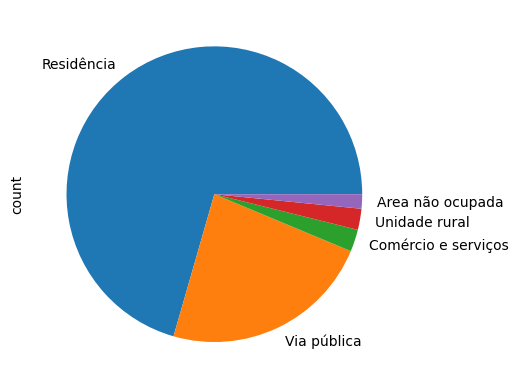

In [67]:
df_2['desc_tipo_local'].value_counts().head(5).sort_values(ascending=False).plot.pie()

### Latitude e Longitude
A Latitude e Longitude do endereço onde ocorreu o crime

##### Comentários
A maior ocorrencia de crimes de homiícios está concentrado na capital de são paulo

In [68]:
df_2[['latitude','longitude']].describe()

,latitude,longitude
count,309.000000,309.000000
mean,-22.886798,-47.053274
std,1.596656,2.908912
min,-24.538717,-52.113980
25%,-23.588189,-47.522510
50%,-23.435339,-46.794108
75%,-22.476922,-46.556460
max,0.000000,0.000000


<Axes: xlabel='longitude', ylabel='latitude'>

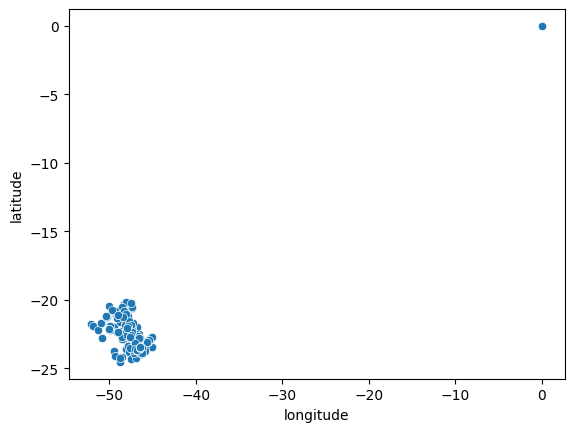

In [69]:
sns.scatterplot(x = df_2['longitude'], y=df_2['latitude'])

In [70]:
df_2_sem_outlier = df_2[(df_2['longitude'] != 0) & (df_2['latitude'] != 0)]

<Axes: xlabel='longitude', ylabel='latitude'>

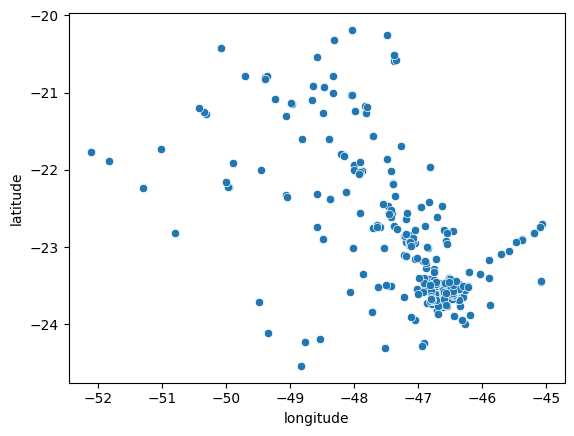

In [71]:
sns.scatterplot(x = df_2_sem_outlier['longitude'], y = df_2_sem_outlier['latitude'])

### DP da Elaboração
Delegacia de policia responsável pela elaboração do B.O do crime

##### Comentários
1. O Municipio, secretaria, departamento e dp são as mesmas que são emitidas o BO (circunscricao)

In [72]:
df_2['dp_elaboracao'].describe()

count                       1019
unique                       388
top       47º D.P. CAPAO REDONDO
freq                          22
Name: dp_elaboracao, dtype: object

In [73]:
df_2['dp_elaboracao'].isna().value_counts()

dp_elaboracao
False    1019
Name: count, dtype: int64

<Axes: ylabel='dp_elaboracao'>

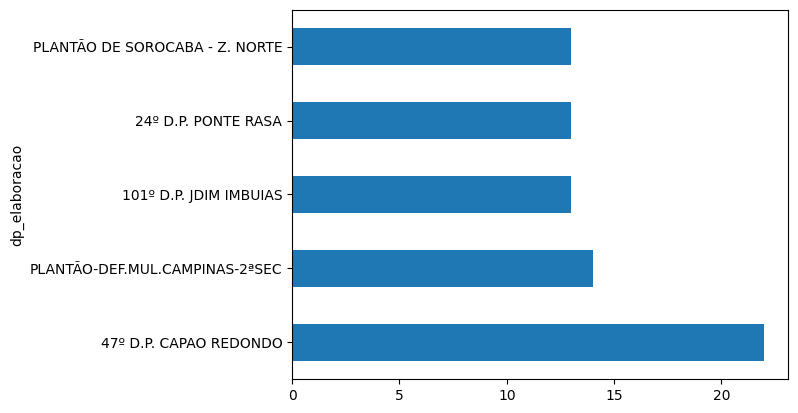

In [74]:
df_2['dp_elaboracao'].value_counts().head(5).sort_values(ascending=False).plot(kind='barh')

In [75]:
pd.crosstab(df_2['dp_elaboracao'], df_2['dp_circunscricao']).head(10)

dp_circunscricao,001 DP - Adamantina,001 DP - Americana,001 DP - Amparo,001 DP - Andradina,001 DP - Araraquara,001 DP - Araras,001 DP - Araçatuba,001 DP - Barretos,001 DP - Barueri,001 DP - Batatais,001 DP - Bauru,001 DP - Botucatu,001 DP - Caieiras,001 DP - Cajamar,001 DP - Caraguatatuba,...,DM - Tatuí,DM - Teodoro Sampaio,DM - Terra Roxa,DM - Tiete,DM - Ubatuba,DM - Ubirajara,DM - Urupes,DM - Valentim Gentil,DM - Vargem Grande Paulista,DM - Vargem Grande do Sul,DM - Vera Cruz,DM - Várzea Pta.,DM - Zacarias,DM - Águas de Lindóia,DM - Álvares Machado
dp_elaboracao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01ª DDM CENTRO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01ª DEL. SEC. CAMPINAS - SHPP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01ª DEL.DEF.MUL. CENTRO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. CAJAMAR,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. CARAPICUIBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. COTIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. GUARUJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. GUARULHOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01º D.P. ITANHAEM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
